# == Explorando comandos ==
##       ETL / Análise Exploratória

## Carregamento e validação dos dados

In [1]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel("../datasets/Aracaju.xlsx")
df2 = pd.read_excel("../datasets/Fortaleza.xlsx")
df3 = pd.read_excel("../datasets/Natal.xlsx")
df4 = pd.read_excel("../datasets/Recife.xlsx")
df5 = pd.read_excel("../datasets/Salvador.xlsx")

In [3]:
df1.sample(5) #Verificando o carregamento dos Dataframes

,Cidade,Data,Vendas,LojaID,Qtde
83,Aracaju,2018-01-01,14.44,1520,5
28,Aracaju,2018-01-01,114.93,1520,5
22,Aracaju,2018-01-01,150.94,1522,1
82,Aracaju,2018-01-01,150.48,1522,4
49,Aracaju,2018-01-01,53.74,1522,3


In [4]:
#Verificando os tipos de dados em cada coluna dos DF carregados

print ("Tipos em df1: \n{}\n".format(df1.dtypes))
print ("Tipos em df2: \n{}\n".format(df2.dtypes))
print ("Tipos em df3: \n{}\n".format(df3.dtypes))
print ("Tipos em df4: \n{}\n".format(df4.dtypes))
print ("Tipos em df5: \n{}".format(df5.dtypes))

Tipos em df1: 
Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

Tipos em df2: 
Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

Tipos em df3: 
Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

Tipos em df4: 
Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

Tipos em df5: 
Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object


In [5]:
df5.count()

Cidade    240
Data      240
Vendas    240
LojaID    240
Qtde      240
dtype: int64

In [6]:
#Criação de Schema para validação do dados
schema = pa.DataFrameSchema(
        columns= {
            "Cidade": pa.Column(pa.Object),
            "Data": pa.Column(pa.DateTime),
            "Vendas": pa.Column(pa.Float64),
            "LojaID": pa.Column(pa.Int64),
            "Qtde": pa.Column(pa.Int64)
        }
)

In [7]:
# Automatizando a validação de todos os DF carregados

dataframes = [df1, df2, df3, df4, df5]
for df in dataframes:
    schema.validate(df)
    print("{} VALIDADO!\n".format(df))

      Cidade       Data  Vendas  LojaID  Qtde
0    Aracaju 2018-01-01  142.00    1520     1
1    Aracaju 2018-01-01   14.21    1522     6
2    Aracaju 2018-01-01   71.55    1520     1
3    Aracaju 2018-01-01    3.01    1521     7
4    Aracaju 2018-01-01   24.51    1522     8
..       ...        ...     ...     ...   ...
125  Aracaju 2018-01-01   15.62    1522     2
126  Aracaju 2018-01-01   13.41    1520     7
127  Aracaju 2018-01-01   33.12    1522     9
128  Aracaju 2018-01-01   37.49    1521     2
129  Aracaju 2018-01-01   13.70    1522     6

[130 rows x 5 columns] VALIDADO!

        Cidade       Data  Vendas  LojaID  Qtde
0    Fortaleza 2019-01-01   45.27    1002     2
1    Fortaleza 2019-01-01  115.61    1002     3
2    Fortaleza 2019-02-10   35.33    1004     3
3    Fortaleza 2019-02-10   20.95    1004     6
4    Fortaleza 2019-01-01   14.25    1004     6
..         ...        ...     ...     ...   ...
137  Fortaleza 2019-03-02   51.99     983     3
138  Fortaleza 2019-03-02  15

In [8]:
# Unificando todos os DF's em um único DF
df = pd.concat(dataframes)
schema.validate(df)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [9]:
df.count()

Cidade    894
Data      894
Vendas    894
LojaID    894
Qtde      894
dtype: int64

## Transformação dos dados

In [10]:
#Alterando o tipo de dado em LojaID
df['LojaID'] = df['LojaID'].astype(object)
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
# Criar nova coluna valor TotalVenda
df["TotalVenda"] = df["Vendas"] * df["Qtde"]
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,TotalVenda
48,Natal,2018-09-20,676.00,852,4,2704.00
185,Natal,2019-01-02,6.67,1036,1,6.67
94,Salvador,2019-01-01,33.24,1037,1,33.24
220,Salvador,2019-01-02,42.71,1035,1,42.71
73,Aracaju,2018-01-01,159.78,1521,3,479.34


In [12]:
# Criação das colunas AnoVenda, MesVenda, DiaVenda
df["AnoVenda"], df["MesVenda"], df["DiaVenda"] = df['Data'].dt.year, df['Data'].dt.month, df['Data'].dt.day
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,TotalVenda,AnoVenda,MesVenda,DiaVenda
31,Salvador,2019-01-01,202.25,1035,2,404.50,2019,1,1
36,Fortaleza,2019-01-01,36.31,1004,2,72.62,2019,1,1
193,Salvador,2019-01-02,3.97,1036,2,7.94,2019,1,2
1,Salvador,2018-01-01,19.02,1034,3,57.06,2018,1,1
60,Aracaju,2018-01-01,215.88,1521,3,647.64,2018,1,1


## Análise exploratória do dados

In [13]:
# Total da receita de cada cidade
print(df.groupby(['Cidade']).TotalVenda.sum().sort_values(ascending=True))

Cidade
Fortaleza     37913.97
Salvador      40596.73
Aracaju       48748.25
Recife        51936.51
Natal        167227.52
Name: TotalVenda, dtype: float64


In [14]:
# Volume total de vendas para cada Cidade
df.groupby(['Cidade']).size().sort_values(ascending=True)

Cidade
Aracaju      130
Fortaleza    142
Recife       142
Natal        240
Salvador     240
dtype: int64

In [15]:
# Volume total de vendas para cada Cidade/Loja
df.groupby(['Cidade', 'LojaID']).size()

Cidade     LojaID
Aracaju    1520      39
           1521      21
           1522      41
           1523      29
Fortaleza  980        5
           981        6
           982       10
           983       13
           1002      30
           1003      20
           1004      28
           1005      30
Natal      852       29
           853       26
           854       28
           1034      23
           1035      44
           1036      49
           1037      41
Recife     980       31
           981       25
           982       34
           983       52
Salvador   1034      44
           1035      68
           1036      68
           1037      60
dtype: int64

In [16]:
# Total valor vendido por Cidade / LojaID
df.groupby(['Cidade', 'LojaID']).TotalVenda.sum()

Cidade     LojaID
Aracaju    1520      12787.81
           1521       9421.48
           1522      15103.92
           1523      11435.04
Fortaleza  980        2478.93
           981        1006.72
           982        3920.33
           983        5239.50
           1002       7983.09
           1003       6731.86
           1004       4261.30
           1005       6292.24
Natal      852       52744.00
           853       42469.00
           854       46655.00
           1034       2975.93
           1035       6781.80
           1036       9045.77
           1037       6556.02
Recife     980       11119.69
           981       10742.15
           982       11899.00
           983       18175.67
Salvador   1034       5487.82
           1035      11911.64
           1036      13189.84
           1037      10007.43
Name: TotalVenda, dtype: float64

## Análise exploratória - Gráficos

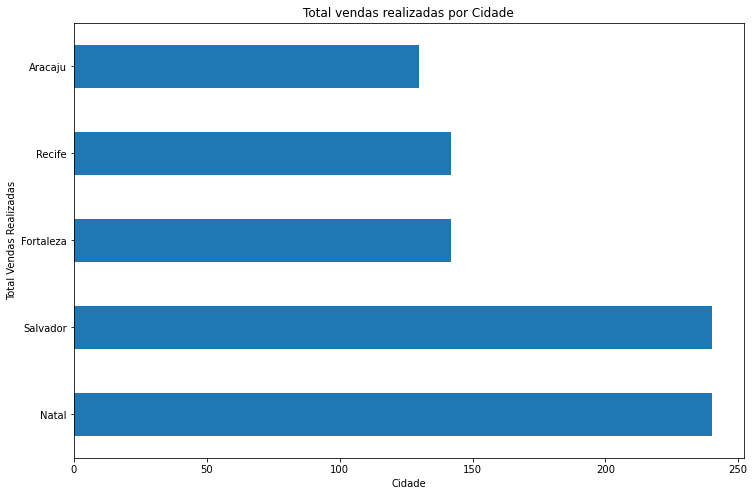

In [17]:
df["Cidade"].value_counts().plot.barh(figsize=(12,8))

plt.title("Total vendas realizadas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas Realizadas", )
plt.show()

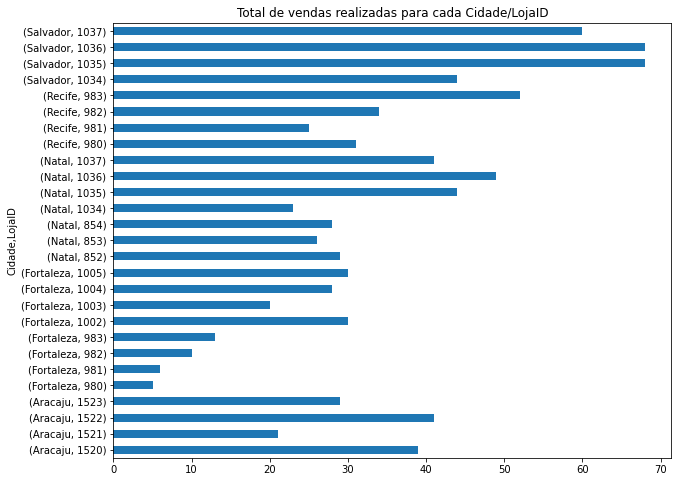

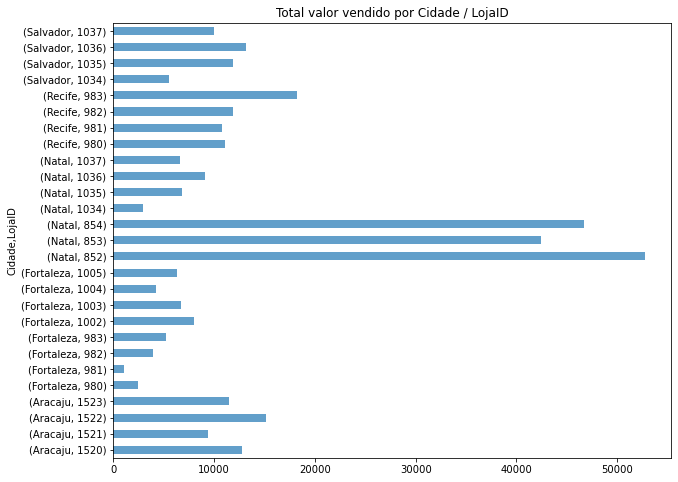

In [18]:
qtd_loja = df.groupby(['Cidade', 'LojaID']).size()
total_venda = df.groupby(['Cidade', 'LojaID']).TotalVenda.sum()

qtd_loja.plot.barh(figsize=(10,8))
plt.title("Total de vendas realizadas para cada Cidade/LojaID")
plt.show()

plt.title("Total valor vendido por Cidade / LojaID")
total_venda.plot.barh(figsize=(10,8), alpha = .7)
plt.show()

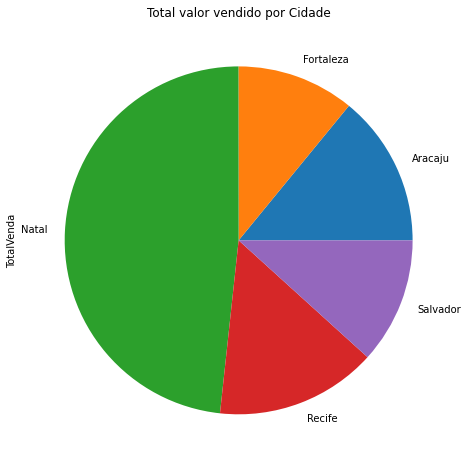

In [19]:
df.groupby(['Cidade'])['TotalVenda'].sum().plot.pie(figsize = (10,8))

plt.title("Total valor vendido por Cidade")
plt.show()

<AxesSubplot:xlabel='MesVenda'>

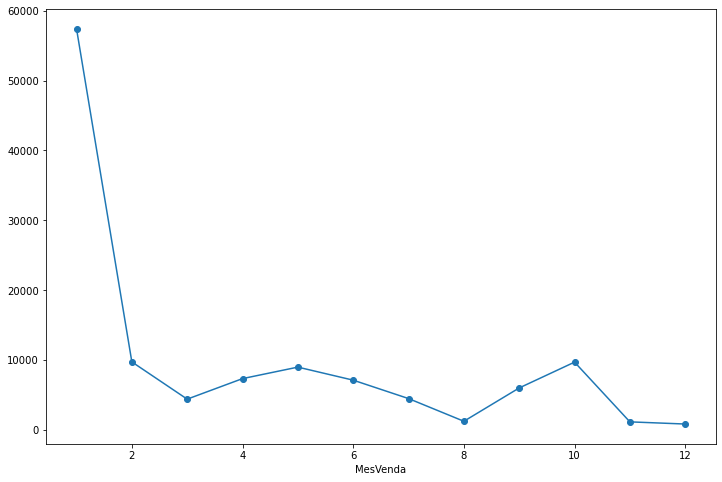

In [20]:
#Total valor vendido por mês-ano 2018
vendas_2018 = df[df['AnoVenda'] == 2018]
vendas_2018.groupby(['MesVenda'])['TotalVenda'].sum().plot(marker='o', figsize=(12,8))

<AxesSubplot:xlabel='MesVenda'>

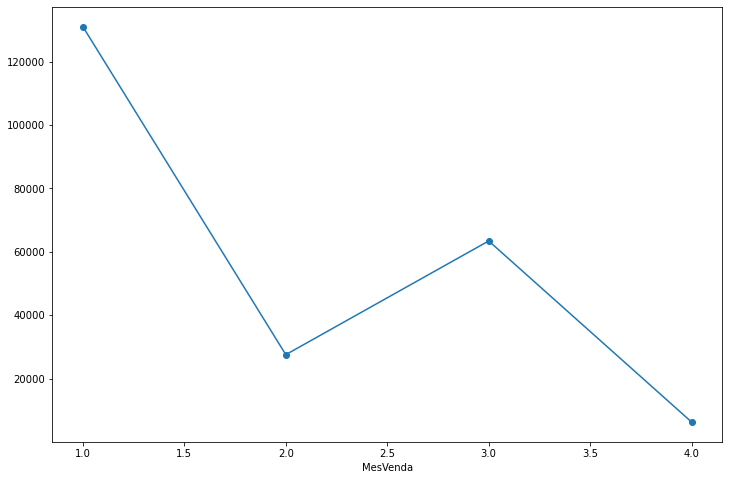

In [21]:
#Total valor vendido por mês-ano 2019
vendas_2019 = df[df['AnoVenda'] == 2019]
vendas_2019.groupby(['MesVenda'])['TotalVenda'].sum().plot(marker='o', figsize=(12,8))

In [22]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,TotalVenda,AnoVenda,MesVenda,DiaVenda
117,Salvador,2019-03-02,39.41,1034,1,39.41,2019,3,2


<AxesSubplot:xlabel='Data'>

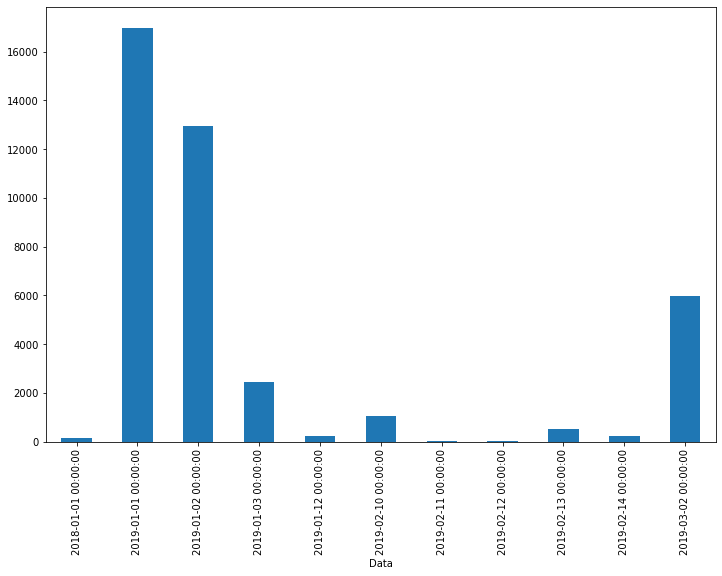

In [23]:
lj_salvador = df[df['Cidade'] == 'Salvador']
lj_salvador.groupby(['Data'])['TotalVenda'].sum().plot.bar(figsize=(12,8))